In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from utils import load_ecg, get_target
from preprocessing.data_processing import normalize
from heartpy import remove_baseline_wander, enhance_ecg_peaks

In [5]:
CURR_FILE[:-4]

'training/train_ecg_05610'

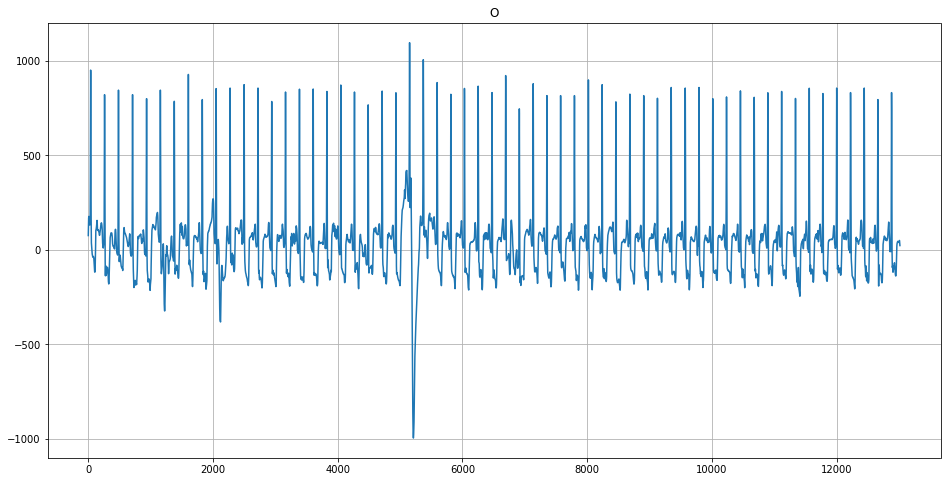

In [16]:
CURR_FILE = "training/train_ecg_02610.mat"
ecg_signal = load_ecg(CURR_FILE)
target = get_target("train_ecg_02610")
# normalize data
normalized_ecg = ecg_signal
plt.figure(1, (16,8))
plt.title(target)
plt.plot(ecg_signal)
plt.grid(which="major")

<ipython-input-17-c68029b02dc1>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


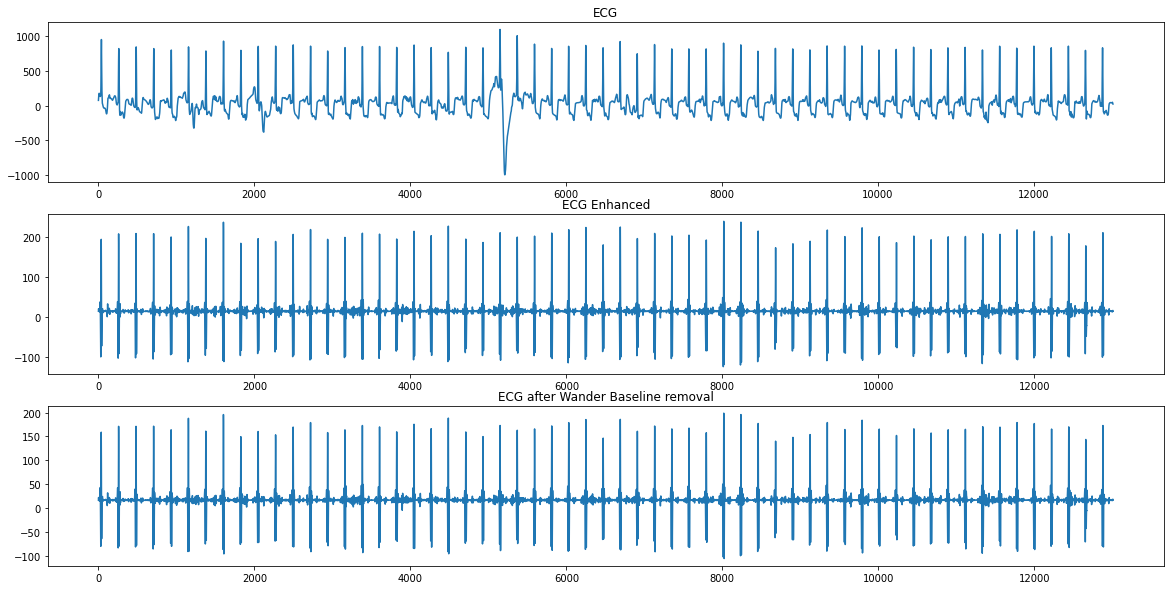

In [17]:
# enhanced QRS complex

enhanced_signal = enhance_ecg_peaks(hrdata=ecg_signal, sample_rate=300)

# remove noise
ohne_noise_ecg = remove_baseline_wander(enhanced_signal, sample_rate=300, cutoff=0.05)

fig, axs = plt.subplots(3, figsize=(20,10))
axs[0].plot(ecg_signal)
axs[0].set_title("ECG")
axs[1].plot(enhanced_signal)
axs[1].set_title("ECG Enhanced")
axs[2].plot(ohne_noise_ecg)
axs[2].set_title("ECG after Wander Baseline removal")

fig.show()

<ipython-input-10-0ac7dd8b192b>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


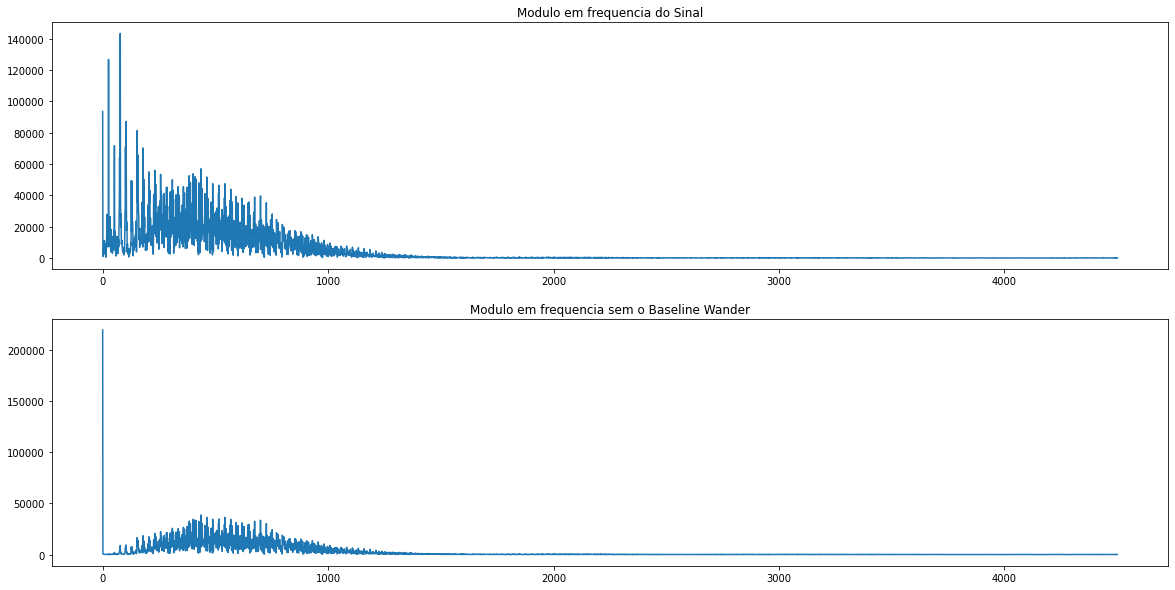

In [10]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
signal = load_ecg("training/train_ecg_00001.mat")
ohne_noise_ecg = remove_baseline_wander(signal, sample_rate=300, cutoff=0.05)

# xf = rfftfreq(N, 1 / SAMPLE_RATE)
fig, axs = plt.subplots(2, figsize=(20,10))
axs[0].plot(np.abs(rfft(signal)))
axs[0].set_title("Modulo em frequencia do Sinal")
axs[0].grid()
axs[1].plot(np.abs(rfft(ohne_noise_ecg)))
axs[1].set_title("Modulo em frequencia sem o Baseline Wander")
axs[0].grid()
fig.show()


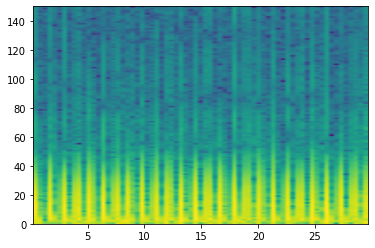

In [13]:
# N
SAMPLE_RATE = 300
signal = load_ecg("training/train_ecg_00001.mat")
plt.specgram(signal, Fs=SAMPLE_RATE);

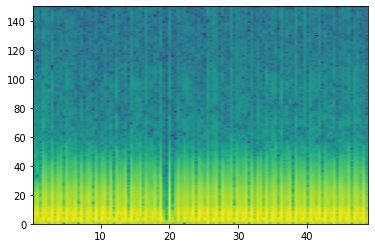

In [16]:
# O
plt.specgram(load_ecg("training/train_ecg_00003.mat"), Fs=300);

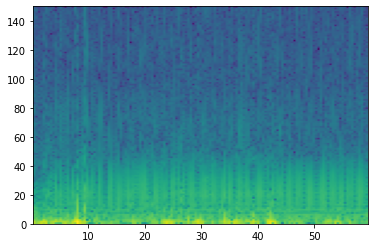

In [ ]:
# ~ Ruido
plt.specgram(load_ecg("training/train_ecg_00011.mat"), Fs=300);

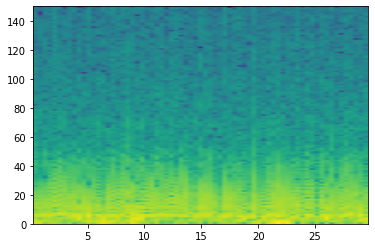

In [ ]:
# A
plt.specgram(load_ecg("training/train_ecg_00016.mat"), Fs=300);

## RR  Peaks with BioSPY

In [17]:
import biosppy
import pyhrv.tools as tools

# Load sample ECG signal & extract R-peaks using BioSppy
signal = load_ecg("training/train_ecg_00001.mat")
signal, rpeaks = biosppy.signals.ecg.ecg(signal, show=False)[1:3]

# Compute NNI
nni = tools.nn_intervals(rpeaks)

# Filter ECG Signal

In [19]:
from utils import load_ecg
from data_processing import normalize
from heartpy.filtering import filter_signal

In [20]:
def analyse_filtered(signal, signal_filtered):
    fig, axs = plt.subplots(2, figsize=(20,10))
    axs[0].plot(signal)
    axs[0].set_title("Sinal sem Filtro")
    axs[1].plot(signal_filtered)
    axs[1].set_title("Sinal Filtrado")
    fig.show()

In [22]:
ecg_signal = normalize(load_ecg("training/train_ecg_00001.mat"))

In [24]:
from preprocessing.filtering import remove_noise, remove_baseline_wander
sig = remove_noise(ecg_signal)
filtered_signal = remove_baseline_wander(sig, sample_rate=300, cutoff=0.05)
 

<ipython-input-20-5e188875a0d2>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


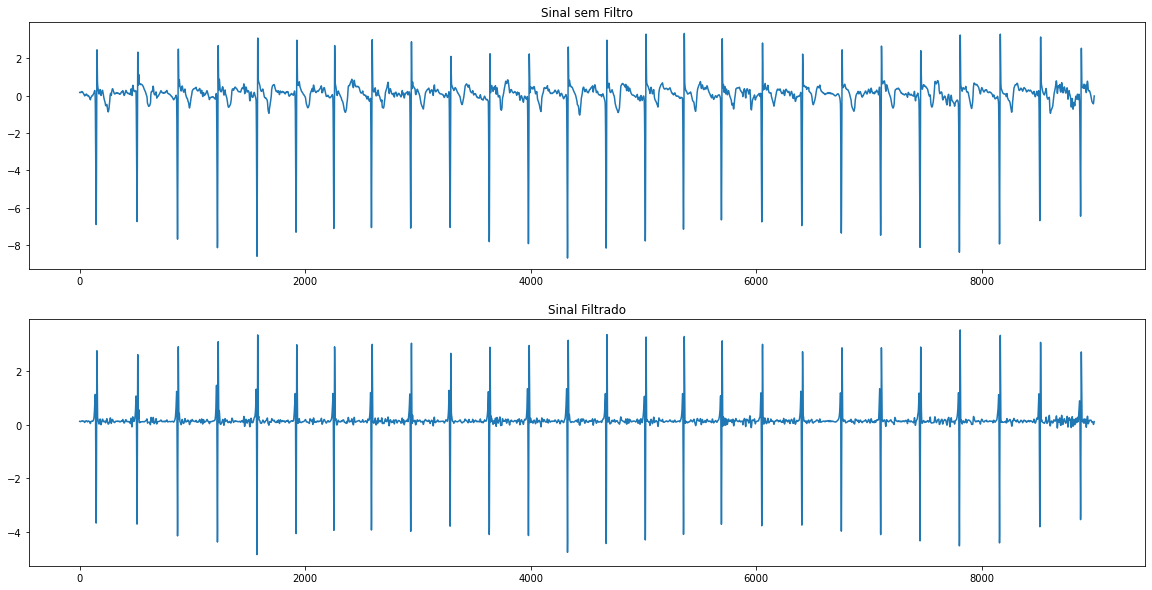

In [25]:
analyse_filtered(ecg_signal, filtered_signal)